In [1]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# read data

In [2]:
country_wise_latest = pd.read_csv('country_wise_latest.csv')
covid_19_clean_complete = pd.read_csv('covid_19_clean_complete.csv')
day_wise = pd.read_csv('day_wise.csv')
full_grouped = pd.read_csv('full_grouped.csv')
usa_county_wise = pd.read_csv('usa_county_wise.csv')
worldometer_data = pd.read_csv('worldometer_data.csv')

In [3]:
country_wise_latest.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [4]:
country_wise_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
covid_19_clean_complete.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [6]:
covid_19_clean_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [8]:
day_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [9]:
full_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [10]:
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [11]:
usa_county_wise.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2  1/22/20          0       0  
3  1/22/20          0       0  
4  1/22/20          0       0

In [12]:
usa_county_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [13]:
worldometer_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [14]:
worldometer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

# check the nulls

In [15]:
worldometer_data.isnull().sum()*100 / worldometer_data.shape[0]

Country/Region       0.000000
Continent            0.478469
Population           0.478469
TotalCases           0.000000
NewCases            98.086124
TotalDeaths         10.047847
NewDeaths           98.564593
TotalRecovered       1.913876
NewRecovered        98.564593
ActiveCases          1.913876
Serious,Critical    41.626794
Tot Cases/1M pop     0.478469
Deaths/1M pop       10.526316
TotalTests           8.612440
Tests/1M pop         8.612440
WHO Region          11.961722
dtype: float64

# clean nulls

In [16]:
dropped_col = ['NewCases','NewDeaths','NewRecovered']
worldometer_data.drop(columns = dropped_col,inplace = True)

In [17]:
worldometer_data.describe()

Population    TotalCases    TotalDeaths  TotalRecovered  \
count  2.080000e+02  2.090000e+02     188.000000    2.050000e+02   
mean   3.041549e+07  9.171850e+04    3792.590426    5.887898e+04   
std    1.047661e+08  4.325867e+05   15487.184877    2.566984e+05   
min    8.010000e+02  1.000000e+01       1.000000    7.000000e+00   
25%    9.663140e+05  7.120000e+02      22.000000    3.340000e+02   
50%    7.041972e+06  4.491000e+03     113.000000    2.178000e+03   
75%    2.575614e+07  3.689600e+04     786.000000    2.055300e+04   
max    1.381345e+09  5.032179e+06  162804.000000    2.576668e+06   

        ActiveCases  Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  \
count  2.050000e+02        122.000000        208.000000     187.000000   
mean   2.766433e+04        534.393443       3196.024038      98.681176   
std    1.746327e+05       2047.518613       5191.986457     174.956862   
min    0.000000e+00          1.000000          3.000000       0.080000   
25%    8.600000e+01          3.250000        282.000000       6.000000   
50%    8.990000e+02         27.500000       1015.000000      29.000000   
75%    7.124000e+03        160.250000       3841.750000      98.000000   
max    2.292707e+06      18296.000000      39922.000000    1238.000000   

         TotalTests   Tests/1M pop  
count  1.910000e+02     191.000000  
mean   1.402405e+06   83959.366492  
std    5.553367e+06  152730.591240  
min    6.100000e+01       4.000000  
25%    2.575200e+04    8956.500000  
50%    1.357020e+05   32585.000000  
75%    7.576960e+05   92154.500000  
max    6.313960e+07  995282.000000

In [18]:
worldometer_data.loc[worldometer_data['Population'].isnull()]

Country/Region Continent  Population  TotalCases  TotalDeaths  \
156  Diamond Princess       NaN         NaN         712         13.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
156           651.0         48.0               4.0               NaN   

     Deaths/1M pop  TotalTests  Tests/1M pop WHO Region  
156            NaN         NaN           NaN        NaN

In [19]:
worldometer_data.drop(156,inplace=True)

In [20]:
numerical_nulls = ['TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','TotalTests','Tests/1M pop','Tot Cases/1M pop','Deaths/1M pop','TotalCases']

for column in numerical_nulls:
    worldometer_data[column] = worldometer_data[column].fillna(worldometer_data[column].median())

In [21]:
worldometer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        208 non-null    int64  
 4   TotalDeaths       208 non-null    float64
 5   TotalRecovered    208 non-null    float64
 6   ActiveCases       208 non-null    float64
 7   Serious,Critical  208 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     208 non-null    float64
 10  TotalTests        208 non-null    float64
 11  Tests/1M pop      208 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 22.8+ KB


In [22]:
worldometer_data['WHO Region'].unique()

array(['Americas', 'South-EastAsia', 'Europe', 'Africa',
       'EasternMediterranean', 'WesternPacific', nan], dtype=object)

In [23]:
worldometer_data.loc[worldometer_data['WHO Region'].isnull()]

Country/Region          Continent  Population  TotalCases  \
84            French Guiana      South America    299385.0        8127   
102                     CAR             Africa   4837752.0        4620   
112                 Mayotte             Africa    273419.0        3042   
158                 Réunion             Africa    895952.0         671   
159         Channel Islands             Europe    174022.0         597   
167             Isle of Man             Europe     85078.0         336   
170              Guadeloupe      North America    400131.0         279   
171              Martinique      North America    375235.0         276   
172          Faeroe Islands             Europe     48882.0         266   
173                   Aruba      North America    106812.0         263   
176          Cayman Islands      North America     65798.0         203   
177               Gibraltar             Europe     33690.0         190   
179            Sint Maarten      North America     42924.0         160   
181                 Brunei                Asia    437893.0         141   
183        Turks and Caicos      North America     38768.0         129   
190        French Polynesia  Australia/Oceania    281072.0          64   
191  St. Vincent Grenadines      North America    110976.0          56   
192            Saint Martin      North America     38729.0          53   
193                   Macao               Asia    650193.0          46   
194                 Curaçao      North America    164161.0          31   
199           New Caledonia  Australia/Oceania    285769.0          22   
204              Montserrat      North America      4992.0          13   
205   Caribbean Netherlands      North America     26247.0          13   
206        Falkland Islands      South America      3489.0          13   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
84          47.0          7240.0        840.0              23.0   
102         59.0          1641.0       2920.0               2.0   
112         39.0          2738.0        265.0               2.0   
158          5.0           592.0         74.0               3.0   
159         47.0           533.0         17.0              30.0   
167         24.0           312.0          0.0              30.0   
170         14.0           179.0         86.0              30.0   
171         15.0            98.0        163.0               1.0   
172        119.0           192.0         74.0               1.0   
173          3.0           114.0        146.0              30.0   
176          1.0           202.0          0.0              30.0   
177        119.0           184.0          6.0              30.0   
179         16.0            64.0         80.0               3.0   
181          3.0           138.0          0.0              30.0   
183          2.0            39.0         88.0               3.0   
190        119.0            62.0          2.0              30.0   
191        119.0            46.0         10.0              30.0   
192          3.0            41.0          9.0               1.0   
193        119.0            46.0          0.0              30.0   
194          1.0            28.0          2.0              30.0   
199        119.0            22.0          0.0              30.0   
204          1.0            10.0          2.0              30.0   
205        119.0             7.0          6.0              30.0   
206        119.0            13.0          0.0              30.0   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop WHO Region  
84            27146.0          157.0     41412.0      138324.0        NaN  
102             955.0           12.0     29589.0        6116.0        NaN  
112           11126.0          143.0     13000.0       47546.0        NaN  
158             749.0            6.0     35419.0       39532.0        NaN  
159            3431.0          270.0     30721.0      176535.0        NaN  
167            3949.0         

In [24]:
worldometer_data['WHO Region'] = worldometer_data['WHO Region'].fillna('0')

In [25]:
for index,row in worldometer_data.iterrows():
    if (row[12] == '0'):
        if (row[1] == 'North America') or (row[1] == 'South America'):
            worldometer_data.iloc[index,12] = 'Americas'
        elif (row[1] == 'Africa'):
            worldometer_data.iloc[index,12] = 'Africa'
        elif (row[1] == 'Europe'):
            worldometer_data.iloc[index,12] = 'Europe'
        elif (row[1] == 'Australia/Oceania') or (row[1] == 'Asia'):
            worldometer_data.iloc[index,12] = 'WesternPacific'

In [26]:
worldometer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        208 non-null    int64  
 4   TotalDeaths       208 non-null    float64
 5   TotalRecovered    208 non-null    float64
 6   ActiveCases       208 non-null    float64
 7   Serious,Critical  208 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     208 non-null    float64
 10  TotalTests        208 non-null    float64
 11  Tests/1M pop      208 non-null    float64
 12  WHO Region        208 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 22.8+ KB


In [27]:
usa_county_wise.head()

UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20          0       0  
2  1/22/20          0       0  
3  1/22/20          0       0  
4  1/22/20          0       0

In [28]:
usa_county_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [29]:
usa_county_wise.isnull().sum()*100 / usa_county_wise.shape[0]

UID               0.000000
iso2              0.000000
iso3              0.000000
code3             0.000000
FIPS              0.299401
Admin2            0.179641
Province_State    0.000000
Country_Region    0.000000
Lat               0.000000
Long_             0.000000
Combined_Key      0.000000
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
dtype: float64

In [30]:
usa_county_wise.dropna(axis = 0 , inplace = True)

In [31]:
usa_county_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624912 entries, 3 to 627908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             624912 non-null  int64  
 1   iso2            624912 non-null  object 
 2   iso3            624912 non-null  object 
 3   code3           624912 non-null  int64  
 4   FIPS            624912 non-null  float64
 5   Admin2          624912 non-null  object 
 6   Province_State  624912 non-null  object 
 7   Country_Region  624912 non-null  object 
 8   Lat             624912 non-null  float64
 9   Long_           624912 non-null  float64
 10  Combined_Key    624912 non-null  object 
 11  Date            624912 non-null  object 
 12  Confirmed       624912 non-null  int64  
 13  Deaths          624912 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 71.5+ MB


# now all data are clean and ready for analysis and visualization

In [32]:
country_wise_latest.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [33]:
country_wise_latest.rename(columns = {'Country/Region':'Country'},inplace = True)

In [34]:
cases = {'Confirmed','Deaths','Recovered','Recovered'}
px.box(country_wise_latest[cases])

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\1089026102.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  px.box(country_wise_latest[cases])


C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\3929981395.py:1: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



<AxesSubplot:>

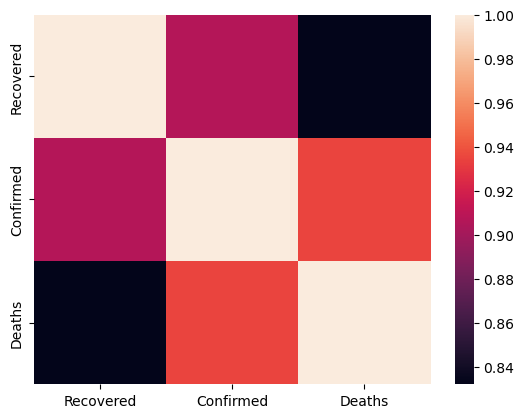

In [35]:
Country_corr = country_wise_latest[cases].corr()
sns.heatmap(Country_corr , data = True)

In [36]:
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

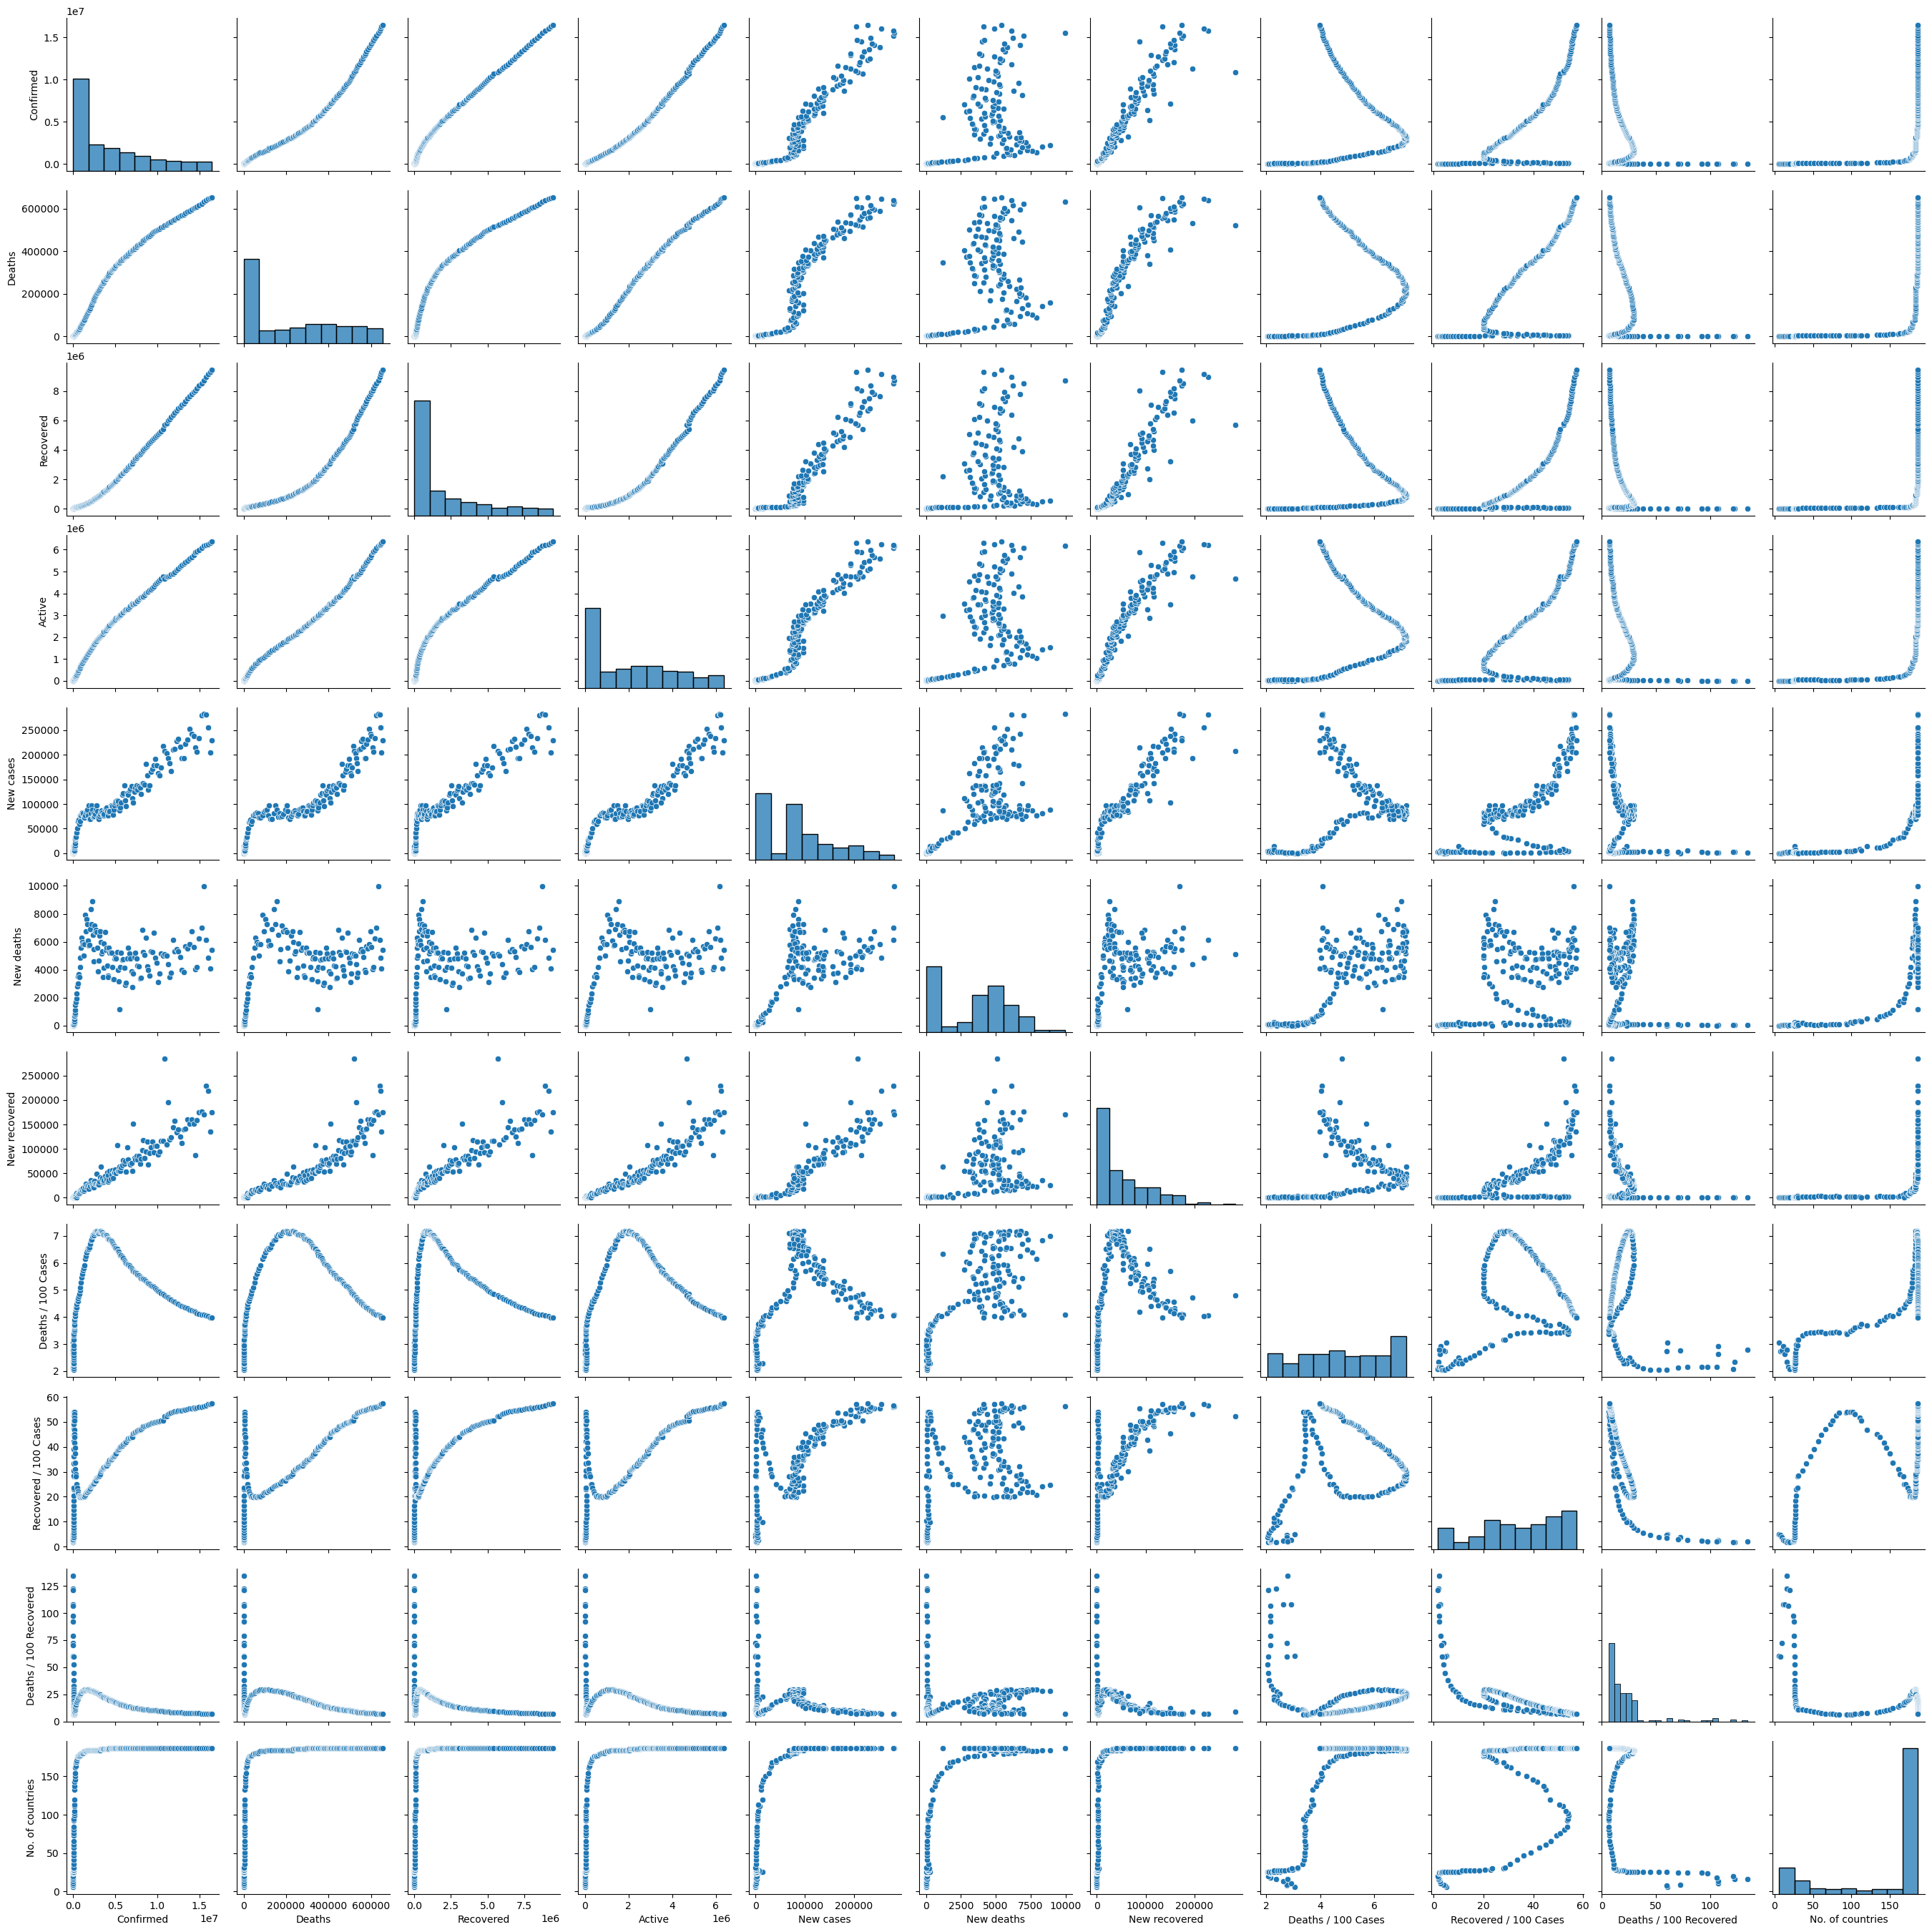

In [37]:
sns.pairplot(data = day_wise)

In [38]:
day_wise.head()
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

<AxesSubplot:>

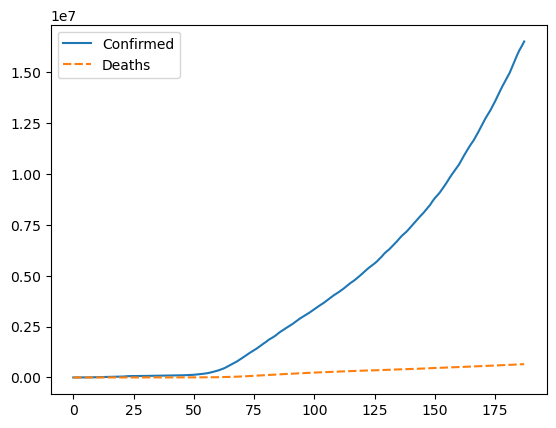

In [39]:
sns.lineplot(data = day_wise[['Confirmed','Deaths','Date']],)

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

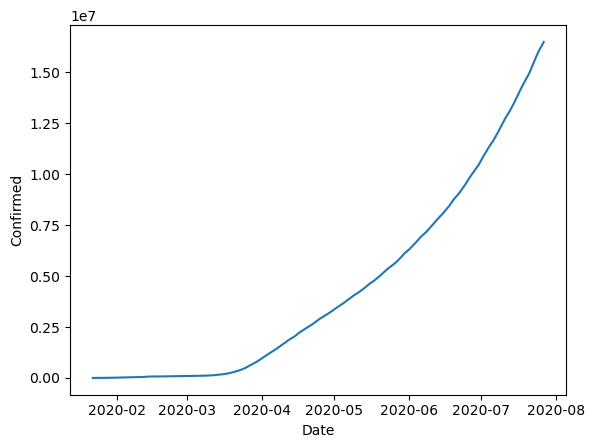

In [40]:
sns.lineplot(data = day_wise,x='Date',y='Confirmed')

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\1522546015.py:3: UserWarning:

Legend does not support 'C' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\1522546015.py:3: UserWarning:

Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\1522546015.py:3: UserWarning:

Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\1522546015.py:3: UserWarning:

Legend does not support 'f' instances.
A proxy artist may be used instead.
Se

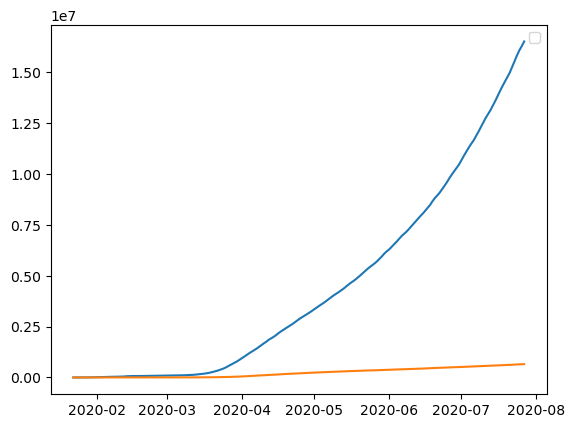

In [41]:
plt.plot(day_wise['Date'],day_wise['Confirmed'])
plt.plot(day_wise['Date'],day_wise['Deaths'])
plt.legend('Confirmed','Deaths')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\3654018037.py:3: UserWarning:

Legend does not support 'C' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\3654018037.py:3: UserWarning:

Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\3654018037.py:3: UserWarning:

Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Dell\AppData\Local\Temp\ipykernel_12272\3654018037.py:3: UserWarning:

Legend does not support 'f' instances.
A proxy artist may be used instead.
Se

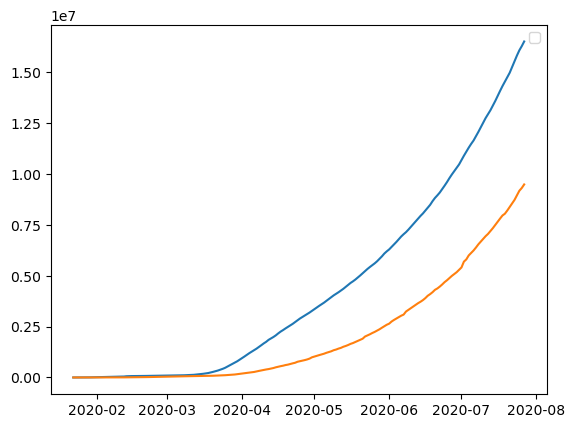

In [42]:
plt.plot(day_wise['Date'],day_wise['Confirmed'])
plt.plot(day_wise['Date'],day_wise['Recovered'])
plt.legend('Confirmed','Deaths')
plt.show()

<AxesSubplot:xlabel='WHO Region', ylabel='Deaths'>

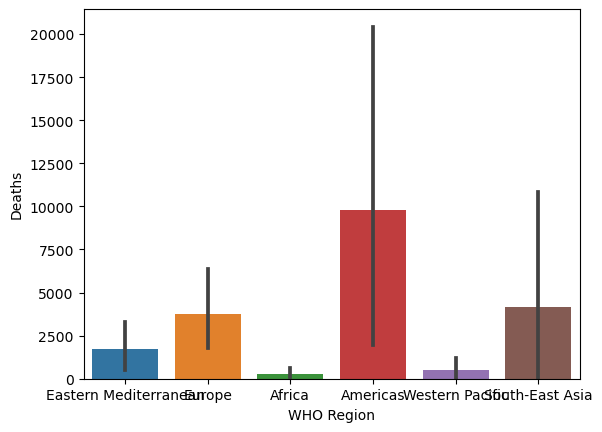

In [43]:
sns.barplot(data = country_wise_latest,x = 'WHO Region',y='Deaths')

<AxesSubplot:xlabel='WHO Region', ylabel='Recovered'>

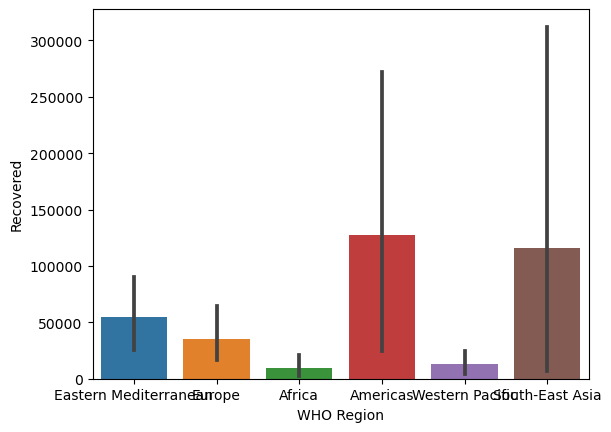

In [44]:
sns.barplot(data = country_wise_latest,x = 'WHO Region',y='Recovered')

# And thats it! , Thank you <3